In [15]:
import cv2
import numpy as np
import time
import os
from tkinter import Tk
from tkinter.filedialog import askopenfilename
import matplotlib.pyplot as plt
import random


def carregar_modelo_yolo():
    base_path = "arquivos_base"  # pasta onde estão os arquivos
    cfg_path = os.path.join(base_path, "yolov3.cfg")
    weights_path = os.path.join(base_path, "yolov3.weights")
    names_path = os.path.join(base_path, "coco.names")
    net = cv2.dnn.readNet(weights_path, cfg_path)
    with open(names_path, "r") as f:
        classes = [line.strip() for line in f.readlines()]
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]
    return net, classes, output_layers


def detectar_yolo(imagem, net, classes, output_layers):
    altura, largura = imagem.shape[:2]
    blob = cv2.dnn.blobFromImage(imagem, 1/255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    outputs = net.forward(output_layers)
    boxes = []
    confidences = []
    class_ids = []
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x, center_y, w, h = detection[0:4] * np.array([largura, altura, largura, altura])
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, int(w), int(h)])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    colors = {}
    for i in indices.flatten():
        x, y, w, h = boxes[i]
        class_id = class_ids[i]
        label = f"{classes[class_id]}: {confidences[i]*100:.1f}%"
        # Define uma cor única por classe
        if class_id not in colors:
            colors[class_id] = [random.randint(0, 255) for _ in range(3)]
        color = colors[class_id]
        cv2.rectangle(imagem, (x, y), (x + w, y + h), color, 2)
        cv2.putText(imagem, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return imagem


def detectar_com_webcam(net, classes, output_layers, filename='captura.jpg'):
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Erro ao abrir a webcam.")
        return
    print("Pressione ESPAÇO para iniciar a contagem de 5s e capturar. ESC para sair.")
    while True:
        ret, frame = cap.read()
        if not ret:
            continue
        cv2.imshow("Webcam", frame)
        key = cv2.waitKey(1)
        if key % 256 == 27:
            print("Cancelado.")
            break
        elif key % 256 == 32:
            print("Capturando em 5 segundos...")
            time.sleep(9)
            cv2.imwrite(filename, frame)
            print(f"Imagem salva como {filename}")
            break
    cap.release()
    cv2.destroyAllWindows()
    imagem = cv2.imread(filename)
    imagem_com_deteccao = detectar_yolo(imagem, net, classes, output_layers)
    imagem_rgb = cv2.cvtColor(imagem_com_deteccao, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 8))
    plt.imshow(imagem_rgb)
    plt.axis('off')
    plt.title("YOLO - Detecção com Webcam")
    plt.show()



def detectar_em_imagem_local(net, classes, output_layers):
    root = Tk()
    root.withdraw()
    caminho_imagem = askopenfilename(title="Selecione a imagem", filetypes=[("Imagens", "*.jpg *.jpeg *.png")])
    if not caminho_imagem:
        print("Nenhuma imagem selecionada.")
        return
    imagem = cv2.imread(caminho_imagem)
    if imagem is None:
        print("Erro ao carregar a imagem.")
        return
    imagem_com_deteccao = detectar_yolo(imagem, net, classes, output_layers)
    imagem_rgb = cv2.cvtColor(imagem_com_deteccao, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 8))
    plt.imshow(imagem_rgb)
    plt.axis('off')
    plt.title("YOLO - Detecção em Imagem Local")
    plt.show()


net, classes, output_layers = carregar_modelo_yolo()

Pressione ESPAÇO para iniciar a contagem de 5s e capturar. ESC para sair.
Capturando em 5 segundos...
Imagem salva como captura.jpg


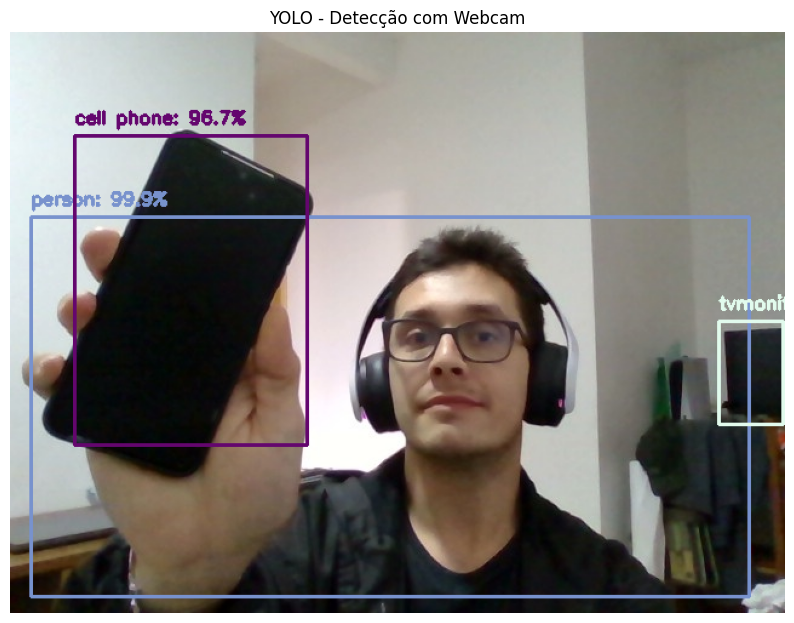

In [17]:
# Webcam:
detectar_com_webcam(net, classes, output_layers)

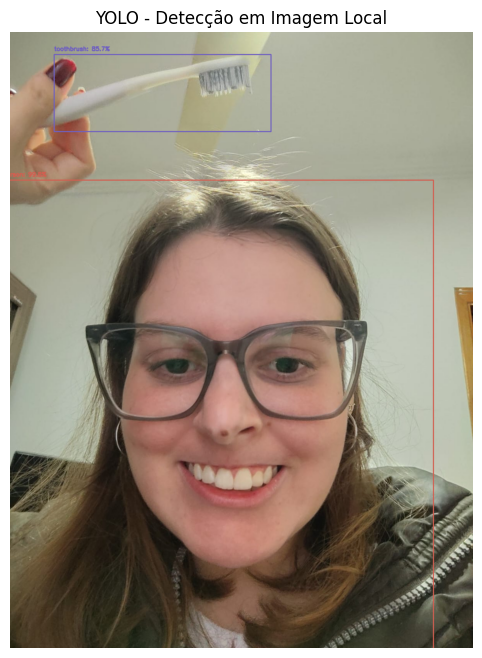

In [23]:
# Imagem local:
detectar_em_imagem_local(net, classes, output_layers)

In [ ]:
def listar_classes_disponiveis(classes):
    for i, classe in enumerate(classes):
        print(f"{i:02d}: {classe}")

# Exemplo de uso:
with open("arquivos_base/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

listar_classes_disponiveis(classes)

00: person
01: bicycle
02: car
03: motorbike
04: aeroplane
05: bus
06: train
07: truck
08: boat
09: traffic light
10: fire hydrant
11: stop sign
12: parking meter
13: bench
14: bird
15: cat
16: dog
17: horse
18: sheep
19: cow
20: elephant
21: bear
22: zebra
23: giraffe
24: backpack
25: umbrella
26: handbag
27: tie
28: suitcase
29: frisbee
30: skis
31: snowboard
32: sports ball
33: kite
34: baseball bat
35: baseball glove
36: skateboard
37: surfboard
38: tennis racket
39: bottle
40: wine glass
41: cup
42: fork
43: knife
44: spoon
45: bowl
46: banana
47: apple
48: sandwich
49: orange
50: broccoli
51: carrot
52: hot dog
53: pizza
54: donut
55: cake
56: chair
57: sofa
58: pottedplant
59: bed
60: diningtable
61: toilet
62: tvmonitor
63: laptop
64: mouse
65: remote
66: keyboard
67: cell phone
68: microwave
69: oven
70: toaster
71: sink
72: refrigerator
73: book
74: clock
75: vase
76: scissors
77: teddy bear
78: hair drier
79: toothbrush
